In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import fcluster
import pylab
import scipy.cluster.hierarchy
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
%matplotlib inline

# k-means

In [2]:
df = pd.read_csv("Customer.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
X = df[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['Male','Female'])
X[:,1] = le_sex.transform(X[:,1]) 

df['Spending Score (1-100)'] = df['Spending Score (1-100)'].astype(float)

X

array([[1, 1, 19, 15, 39],
       [2, 1, 21, 15, 81],
       [3, 0, 20, 16, 6],
       [4, 0, 23, 16, 77],
       [5, 0, 31, 17, 40],
       [6, 0, 22, 17, 76],
       [7, 0, 35, 18, 6],
       [8, 0, 23, 18, 94],
       [9, 1, 64, 19, 3],
       [10, 0, 30, 19, 72],
       [11, 1, 67, 19, 14],
       [12, 0, 35, 19, 99],
       [13, 0, 58, 20, 15],
       [14, 0, 24, 20, 77],
       [15, 1, 37, 20, 13],
       [16, 1, 22, 20, 79],
       [17, 0, 35, 21, 35],
       [18, 1, 20, 21, 66],
       [19, 1, 52, 23, 29],
       [20, 0, 35, 23, 98],
       [21, 1, 35, 24, 35],
       [22, 1, 25, 24, 73],
       [23, 0, 46, 25, 5],
       [24, 1, 31, 25, 73],
       [25, 0, 54, 28, 14],
       [26, 1, 29, 28, 82],
       [27, 0, 45, 28, 32],
       [28, 1, 35, 28, 61],
       [29, 0, 40, 29, 31],
       [30, 0, 23, 29, 87],
       [31, 1, 60, 30, 4],
       [32, 0, 21, 30, 73],
       [33, 1, 53, 33, 4],
       [34, 1, 18, 33, 92],
       [35, 0, 49, 33, 14],
       [36, 0, 21, 33, 81],
       

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
clusterNum = 10
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 100)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5
 6 5 6 5 6 1 1 5 1 1 1 1 1 1 1 1 8 1 1 1 8 1 8 8 1 8 8 8 1 8 8 1 1 8 8 8 8
 8 7 8 8 7 8 8 8 8 8 7 8 8 7 7 8 8 7 9 7 7 7 9 7 9 7 7 9 9 7 9 7 9 9 9 9 9
 7 9 7 7 7 9 9 9 9 7 9 9 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4]


In [6]:
df["Clus_km"] = labels
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clus_km
0,1,Male,19,15,39.0,5
1,2,Male,21,15,81.0,6
2,3,Female,20,16,6.0,5
3,4,Female,23,16,77.0,6
4,5,Female,31,17,40.0,5


# hierarchy

In [7]:
featureset = X

In [8]:
from sklearn.preprocessing import MinMaxScaler
x = featureset
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.        , 1.        , 0.01923077, 0.        , 0.3877551 ],
       [0.00502513, 1.        , 0.05769231, 0.        , 0.81632653],
       [0.01005025, 0.        , 0.03846154, 0.00819672, 0.05102041],
       [0.01507538, 0.        , 0.09615385, 0.00819672, 0.7755102 ],
       [0.0201005 , 0.        , 0.25      , 0.01639344, 0.39795918]])

In [9]:
import numpy as np
import scipy.spatial

leng = feature_mtx.shape[0]
D = np.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])
D

array([[0.        , 0.43032315, 1.055428  , ..., 1.41345435, 1.44858323,
        1.49877657],
       [0.43032315, 0.        , 1.25942674, ..., 1.35931186, 1.56141421,
        1.42138915],
       [1.055428  , 1.25942674, 0.        , ..., 1.818757  , 1.73838961,
        1.902105  ],
       ...,
       [1.41345435, 1.35931186, 1.818757  , ..., 0.        , 0.57852001,
        0.13469899],
       [1.44858323, 1.56141421, 1.73838961, ..., 0.57852001, 0.        ,
        0.66439853],
       [1.49877657, 1.42138915, 1.902105  , ..., 0.13469899, 0.66439853,
        0.        ]])

In [10]:
Z = hierarchy.linkage(D, 'complete')

C:\Users\nik0228\AppData\Local\Temp\ipykernel_25240\2406838188.py:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'complete')


In [11]:
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([12, 12, 21, 19, 28, 19, 21, 19, 11, 19, 11, 19, 20, 19, 13, 12, 28,
       12, 13, 19, 13, 12, 20, 12, 20, 12, 28, 13, 28, 19, 11, 19, 11, 12,
       28, 19, 28, 27, 28, 19, 26, 12, 10, 27, 28, 27, 25, 27, 27, 27, 25,
        7, 27, 10, 25, 10, 25,  9, 27, 10,  9,  7, 26, 25, 10,  7, 22, 26,
        7, 27,  9, 22, 25, 25, 10,  7, 22,  8, 23, 22, 10,  8,  9, 22, 23,
        8, 25, 23, 23, 22, 26,  7,  8, 22, 23,  7, 22, 23,  8,  7, 23, 22,
        9,  7,  8, 23, 26,  8,  9,  9,  9, 23, 22,  7, 23, 23, 26, 22, 22,
       22,  7, 22, 22,  5, 24, 24,  8,  5,  4,  5,  4,  5, 24, 24,  3, 15,
       18,  5,  3, 24, 17,  5, 24, 15,  3,  5,  8, 24, 18,  5,  4,  5, 18,
       15, 18, 15,  4, 15,  4, 15, 18, 15,  3, 15,  4, 15,  4, 15, 18,  6,
        4,  6,  4,  6, 17, 15,  4,  6,  4,  6, 18, 14,  4, 14, 18,  6, 17,
        6, 18, 14, 18, 14,  2, 14, 16, 14, 16,  1,  2,  1], dtype=int32)

In [12]:
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([3, 3, 5, 5, 5, 5, 5, 5, 3, 5, 3, 5, 5, 5, 3, 3, 5, 3, 3, 5, 3, 3,
       5, 3, 5, 3, 5, 3, 5, 5, 3, 5, 3, 3, 5, 5, 5, 5, 5, 5, 5, 3, 2, 5,
       5, 5, 5, 5, 5, 5, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 2, 2, 5, 5, 2, 2,
       5, 5, 2, 5, 2, 5, 5, 5, 2, 2, 5, 2, 5, 5, 2, 2, 2, 5, 5, 2, 5, 5,
       5, 5, 5, 2, 2, 5, 5, 2, 5, 5, 2, 2, 5, 5, 2, 2, 2, 5, 5, 2, 2, 2,
       2, 5, 5, 2, 5, 5, 5, 5, 5, 5, 2, 5, 5, 1, 5, 5, 2, 1, 1, 1, 1, 1,
       5, 5, 1, 4, 4, 1, 1, 5, 4, 1, 5, 4, 1, 1, 2, 5, 4, 1, 1, 1, 4, 4,
       4, 4, 1, 4, 1, 4, 4, 4, 1, 4, 1, 4, 1, 4, 4, 1, 1, 1, 1, 1, 4, 4,
       1, 1, 1, 1, 4, 4, 1, 4, 4, 1, 4, 1, 4, 4, 4, 4, 1, 4, 4, 4, 4, 1,
       1, 1], dtype=int32)

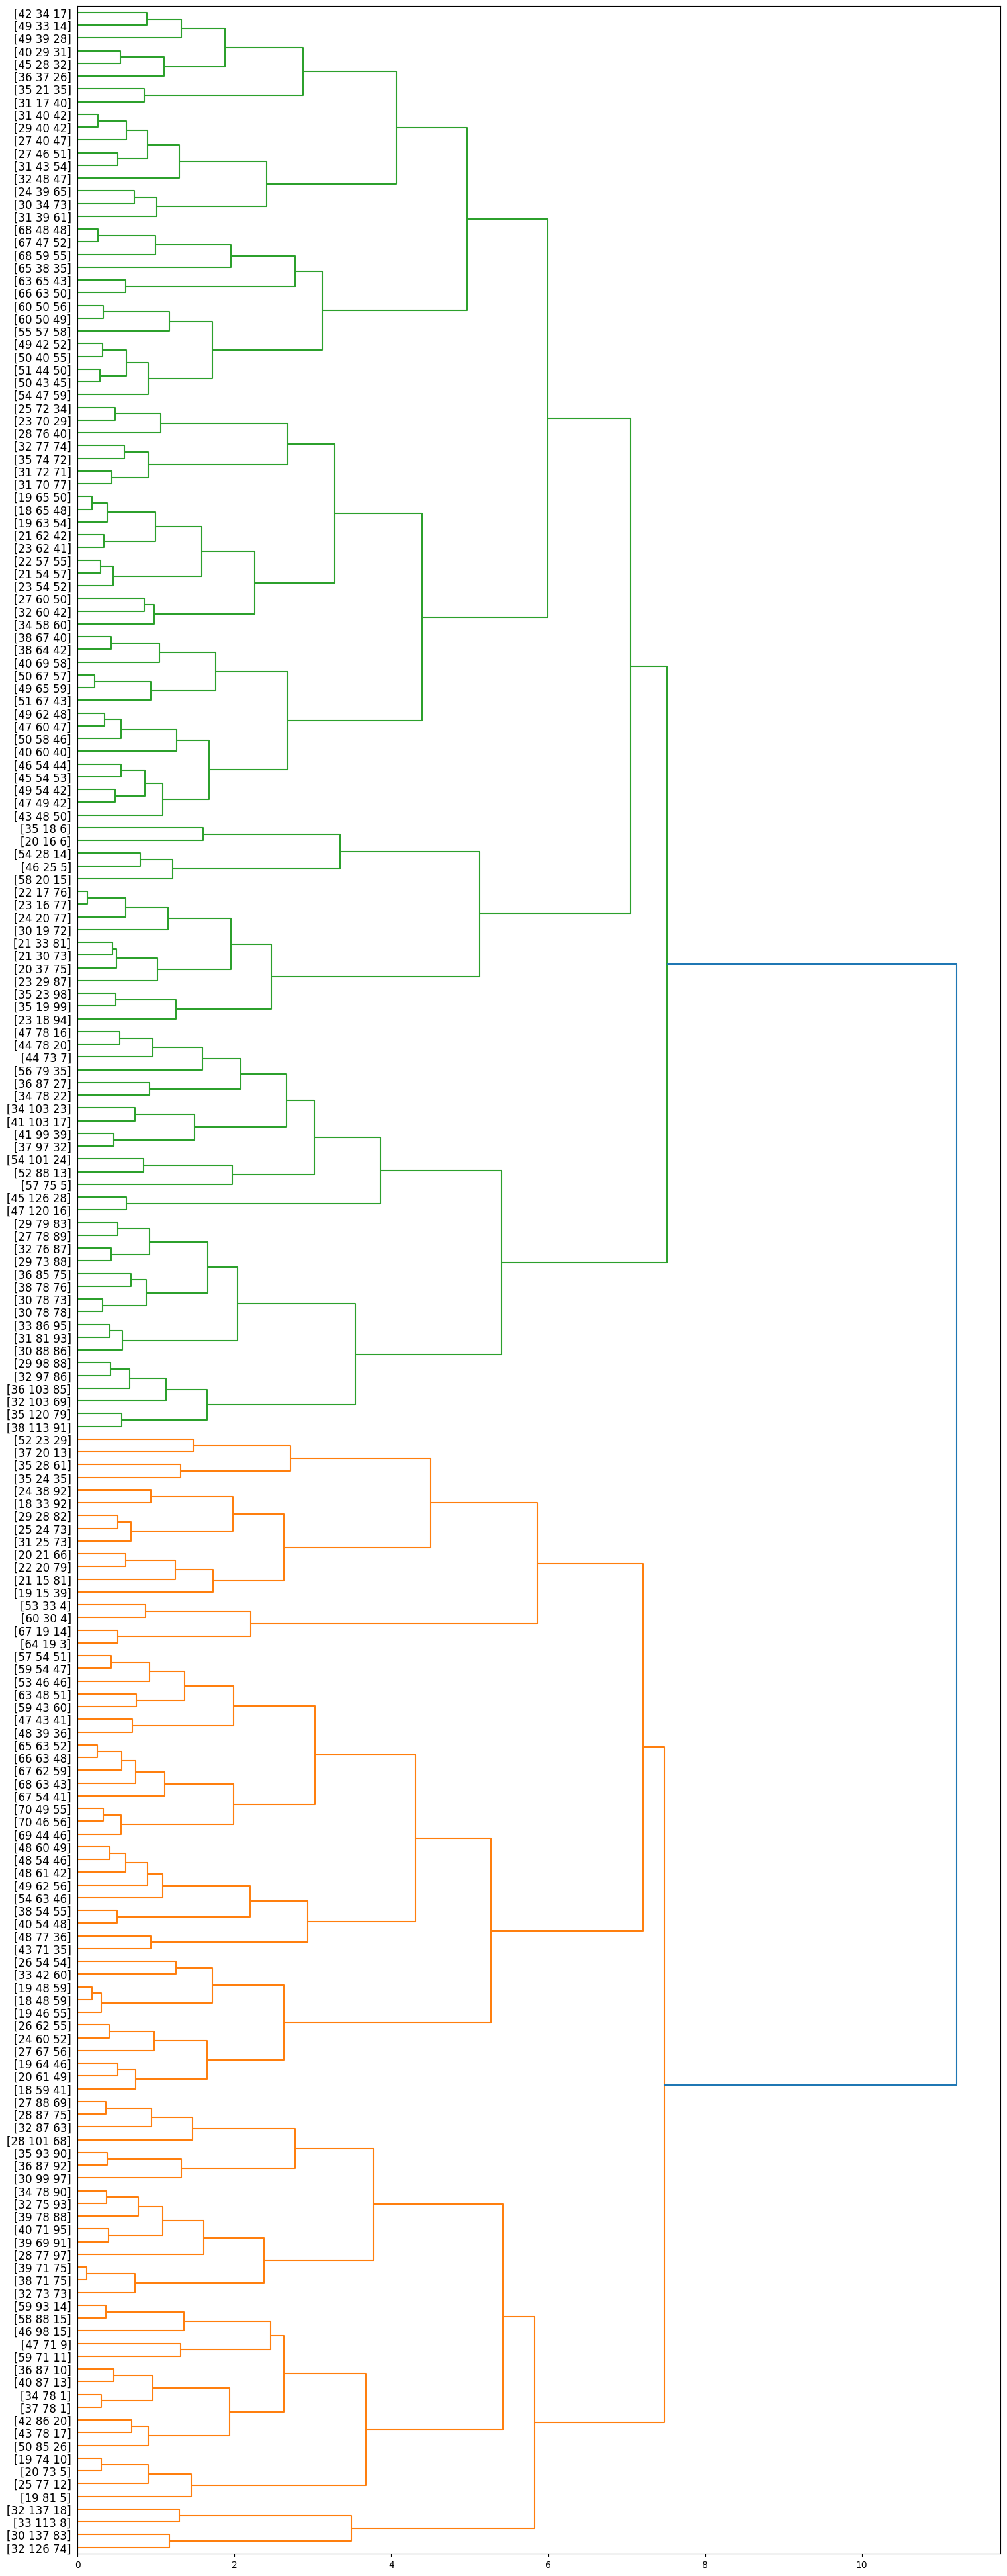

In [13]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (df['Age'][id], df['Annual Income (k$)'][id], int(float(df['Spending Score (1-100)'][id])) )
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

# DB SCAN

In [14]:
X

array([[1, 1, 19, 15, 39],
       [2, 1, 21, 15, 81],
       [3, 0, 20, 16, 6],
       [4, 0, 23, 16, 77],
       [5, 0, 31, 17, 40],
       [6, 0, 22, 17, 76],
       [7, 0, 35, 18, 6],
       [8, 0, 23, 18, 94],
       [9, 1, 64, 19, 3],
       [10, 0, 30, 19, 72],
       [11, 1, 67, 19, 14],
       [12, 0, 35, 19, 99],
       [13, 0, 58, 20, 15],
       [14, 0, 24, 20, 77],
       [15, 1, 37, 20, 13],
       [16, 1, 22, 20, 79],
       [17, 0, 35, 21, 35],
       [18, 1, 20, 21, 66],
       [19, 1, 52, 23, 29],
       [20, 0, 35, 23, 98],
       [21, 1, 35, 24, 35],
       [22, 1, 25, 24, 73],
       [23, 0, 46, 25, 5],
       [24, 1, 31, 25, 73],
       [25, 0, 54, 28, 14],
       [26, 1, 29, 28, 82],
       [27, 0, 45, 28, 32],
       [28, 1, 35, 28, 61],
       [29, 0, 40, 29, 31],
       [30, 0, 23, 29, 87],
       [31, 1, 60, 30, 4],
       [32, 0, 21, 30, 73],
       [33, 1, 53, 33, 4],
       [34, 1, 18, 33, 92],
       [35, 0, 49, 33, 14],
       [36, 0, 21, 33, 81],
       

In [15]:
X = df[['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(X)
feature_mtx [0:5]

array([[0.        , 0.01923077, 0.        , 0.3877551 ],
       [0.00502513, 0.05769231, 0.        , 0.81632653],
       [0.01005025, 0.03846154, 0.00819672, 0.05102041],
       [0.01507538, 0.09615385, 0.00819672, 0.7755102 ],
       [0.0201005 , 0.25      , 0.01639344, 0.39795918]])

In [16]:
epsilon = 0.15
minimumSamples = 5
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(feature_mtx)
labels = db.labels_
labels

array([-1,  0, -1,  0, -1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1,  0,  1,
        0, -1, -1,  1,  0,  2,  0,  2,  0,  1,  0,  1,  0, -1,  0,  2,  0,
        2,  0,  2,  0,  1,  0, -1,  0,  3,  0,  3,  0,  3,  0,  0,  0,  3,
        0,  0,  3,  3,  3,  3,  3,  0,  3,  3,  0,  3,  3,  3,  0,  3,  3,
        0,  0,  3,  3,  3,  3,  3,  0,  3,  3,  0,  3,  3,  3,  3,  3,  0,
        3,  3,  0,  3,  3,  3,  0,  3,  3,  0,  0,  3,  0,  3,  0,  0,  3,
        3,  0,  3,  0,  3,  3,  3,  3,  3,  0, -1,  0,  0,  0,  3,  3,  3,
        3,  0, -1, -1, -1, -1,  4, -1, -1, -1,  4, -1,  4, -1,  4, -1,  4,
        5,  4, -1,  4, -1,  4, -1,  4, -1,  4, -1,  4, -1,  4,  5,  4,  5,
        4,  5,  4, -1,  4, -1,  4, -1,  4, -1,  4,  5,  4,  5,  4,  5,  4,
        5,  4, -1,  4,  6,  4,  6,  4,  6,  4, -1,  4,  6,  4, -1,  4, -1,
        4, -1,  4, -1, -1, -1,  4, -1, -1, -1, -1, -1, -1], dtype=int64)

In [17]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([False,  True, False,  True, False,  True, False, False, False,
        True, False, False, False,  True, False,  True, False,  True,
       False, False, False,  True, False,  True, False,  True, False,
       False,  True,  True, False,  True, False, False,  True,  True,
       False,  True, False, False, False, False,  True,  True, False,
       False,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True, False,  True, False,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True, False, False, False, False, False,  True,
       False, False,

In [18]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

7

In [19]:
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2, 3, 4, 5, 6}

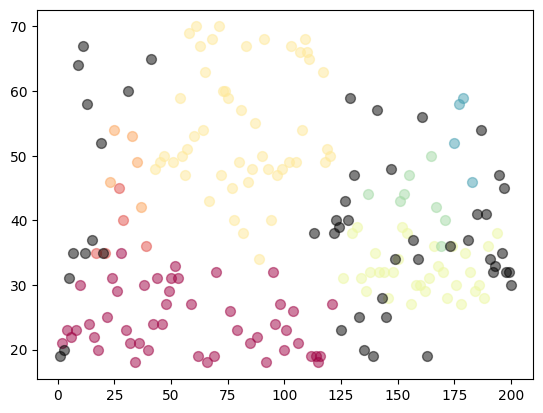

In [20]:
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)